<center><center><h1> Title of the project</h1></center>

<h2>ADVANCED STUDENT ACADEMIC PRIDICTION USING MACHINE LEARNING</h>

## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the required dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/performance_data.csv')

## Displaying the dataset

In [ ]:
df.head(7)

,10th Marks,Medium,Board,Intermediate marks,Eamcet Rank,Attendance,Backlogs,Education gaps,Parents Status,Health,Disability,Maritial Status,Parents Education,Sports,Logical thinking,degree marks
0,5.9,english,ICSE,719,42814,76,3,2,Normal,Average,no,yes,no,Active,not_participated,first_class
1,8.0,telugu,CBSE,772,46663,148,6,1,passed_out,Bad,no,no,no,non_active,participated,Destincton
2,8.3,telugu,State,598,29287,91,4,2,Normal,Good,yes,no,yes,Active,participated,first_class
3,8.0,telugu,CBSE,898,4912,60,3,0,Normal,Good,yes,yes,no,non_active,not_participated,first_class
4,8.7,telugu,ICSE,535,29961,102,3,0,Divorced,Bad,no,yes,yes,Active,not_participated,pass_class
5,7.8,telugu,CBSE,678,4838,136,1,1,Normal,Bad,yes,yes,no,Active,not_participated,Destincton
6,7.5,telugu,ICSE,940,38704,107,3,1,passed_out,Bad,yes,no,yes,Active,not_participated,pass_class


## Checking whether null values are present or not

In [ ]:
df.isnull().sum()

10th Marks            0
Medium                0
Board                 0
Intermediate marks    0
Eamcet Rank           0
Attendance            0
Backlogs              0
Education gaps        0
Parents Status        0
Health                0
Disability            0
Maritial Status       0
Parents Education     0
Sports                0
Logical thinking      0
degree marks          0
dtype: int64

## Data Transformation:Converting the categorical data into numerical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19320 entries, 0 to 19319
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   10th Marks          19320 non-null  float64
 1   Medium              19320 non-null  object 
 2   Board               19320 non-null  object 
 3   Intermediate marks  19320 non-null  int64  
 4   Eamcet Rank         19320 non-null  int64  
 5   Attendance          19320 non-null  int64  
 6   Backlogs            19320 non-null  int64  
 7   Education gaps      19320 non-null  int64  
 8   Parents Status      19320 non-null  object 
 9   Health              19320 non-null  object 
 10  Disability          19320 non-null  object 
 11  Maritial Status     19320 non-null  object 
 12  Parents Education   19320 non-null  object 
 13  Sports              19320 non-null  object 
 14  Logical thinking    19320 non-null  object 
 15  degree marks        19320 non-null  object 
dtypes: f

In [ ]:
df.dtypes

10th Marks            float64
Medium                 object
Board                  object
Intermediate marks      int64
Eamcet Rank             int64
Attendance              int64
Backlogs                int64
Education gaps          int64
Parents Status         object
Health                 object
Disability             object
Maritial Status        object
Parents Education      object
Sports                 object
Logical thinking       object
degree marks           object
dtype: object

In [ ]:
# Lets check the data in the medium column
df['Medium'].value_counts()

english    9753
telugu     9567
Name: Medium, dtype: int64

In [ ]:
## Replacing the english with '0' and telugu to '1'
df['Medium']=df['Medium'].replace(('english','telugu'),(0,1))

In [ ]:
# Lets check the data in the board column
df['Board'].value_counts()

CBSE     6610
State    6489
ICSE     6221
Name: Board, dtype: int64

In [ ]:
## Replacing the CBSE with '0' and ICSE to '1' and State with '2'
df['Board']=df['Board'].replace(('CBSE','ICSE','State'),(0,1,2))

In [ ]:
# Lets check the data in the Parents Status column
df['Parents Status'].value_counts()

Normal        6590
Divorced      6431
passed_out    6299
Name: Parents Status, dtype: int64

In [ ]:
## Replacing the passed_out with '0' and Divorced to '1' and Normal with '2'
df['Parents Status']=df['Parents Status'].replace(('passed_out','Divorced','Normal'),(0,1,2))

In [ ]:
# Lets check the data in the Health column
df['Health'].value_counts()

Good       6504
Average    6411
Bad        6405
Name: Health, dtype: int64

In [ ]:
## Replacing the Bad with '0' and Good to '1' and Average with '2'
df['Health']=df['Health'].replace(('Bad','Good','Average'),(0,1,2))

In [ ]:
# Lets check the data in the Disability column
df['Disability'].value_counts()

yes    9994
no     9326
Name: Disability, dtype: int64

In [ ]:
## Replacing the yes with '0' and no to '1'
df['Disability']=df['Disability'].replace(('yes','no'),(0,1))

In [ ]:
# Lets check the data in the Maritial Status column
df['Maritial Status'].value_counts()

no     9711
yes    9609
Name: Maritial Status, dtype: int64

In [ ]:
## Replacing the yes with '0' and no to '1'
df['Maritial Status']=df['Maritial Status'].replace(('yes','no'),(0,1))

In [ ]:
## Replacing the yes with '0' and no to '1'
df['Parents Education']=df['Parents Education'].replace(('yes','no'),(0,1))

In [ ]:
# Lets check the data in the Parents Education column
df['Parents Education'].value_counts()

yes    9782
no     9538
Name: Parents Education, dtype: int64

In [ ]:

# Lets check the data in the Sports column
df['Sports'].value_counts()

0    9950
1    9370
Name: Sports, dtype: int64

In [ ]:
## Replacing the non_active with '0' and Active to '1'
df['Sports']=df['Sports'].replace(('non_active','Active'),(0,1))

In [ ]:
## Replacing the non_active with '0' and Active to '1'
df['Parents Education']=df['Parents Education'].replace(('non_active','Active'),(0,1))

In [ ]:
# Lets check the data in the Logical thinking column
df['Logical thinking'].value_counts()

participated        9723
not_participated    9597
Name: Logical thinking, dtype: int64

In [ ]:
## Replacing the not_participated with '0' and participated to '1'
df['Logical thinking']=df['Logical thinking'].replace(('not_participated','participated'),(0,1))

In [ ]:
df.dtypes

10th Marks            float64
Medium                  int64
Board                   int64
Intermediate marks      int64
Eamcet Rank             int64
Attendance              int64
Backlogs                int64
Education gaps          int64
Parents Status          int64
Health                  int64
Disability              int64
Maritial Status         int64
Parents Education       int64
Sports                  int64
Logical thinking        int64
degree marks           object
dtype: object

In [ ]:
## Lets seperate the input and output column
x=df.drop(['degree marks'],axis=1)
y=df['degree marks']

In [ ]:
## Diplaying the top 5 rows of the input data
x.head()

,10th Marks,Medium,Board,Intermediate marks,Eamcet Rank,Attendance,Backlogs,Education gaps,Parents Status,Health,Disability,Maritial Status,Parents Education,Sports,Logical thinking
0,5.9,0,1,719,42814,76,3,2,2,2,1,0,1,1,0
1,8.0,1,0,772,46663,148,6,1,0,0,1,1,1,0,1
2,8.3,1,2,598,29287,91,4,2,2,1,0,1,0,1,1
3,8.0,1,0,898,4912,60,3,0,2,1,0,0,1,0,0
4,8.7,1,1,535,29961,102,3,0,1,0,1,0,0,1,0


In [ ]:
x.shape

(19320, 15)

In [ ]:
## Diplaying the top 5 rows of the output data
y.head()

0    first_class
1     Destincton
2    first_class
3    first_class
4     pass_class
Name: degree marks, dtype: object

In [ ]:
y.shape

(19320,)

<h3> Train and Test Data

In [ ]:
## Lets implement the training data and testing data
from sklearn.model_selection import train_test_split

In [ ]:
## Lets divide the data into the training and testing and store the data in the variables
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<h3>RandomForest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a1=accuracy_score(y_test,y_pred)

In [ ]:
a1

0.9019151138716356

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Destincton       0.90      0.93      0.91       997
 first_class       0.87      0.90      0.88       888
  pass_class       0.92      0.89      0.91      1040
second_class       0.92      0.89      0.90       939

    accuracy                           0.90      3864
   macro avg       0.90      0.90      0.90      3864
weighted avg       0.90      0.90      0.90      3864



In [ ]:
x.keys()

Index(['10th Marks', 'Medium', 'Board', 'Intermediate marks', 'Eamcet Rank',
       'Attendance', 'Backlogs ', 'Education gaps', 'Parents Status', 'Health',
       'Disability', 'Maritial Status', 'Parents Education', 'Sports',
       'Logical thinking'],
      dtype='object')

In [ ]:
rf.predict([[9,0,2,890,5000,100,6,1,0,0,1,1,1,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['second_class'], dtype=object)

In [ ]:
rf.predict([[6,0,2,617,9566,116,6,0,2,2,1,1,1,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['pass_class'], dtype=object)

In [ ]:
rf.predict([[8.5,1,1,791,66835,137,3,0,1,0,0,1,1,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['first_class'], dtype=object)

In [ ]:
rf.predict([[5.6,1,0,559,31580,65,5,2,0,0,1,0,0,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['second_class'], dtype=object)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a2=accuracy_score(y_test,y_pred)

In [ ]:
a2

0.4469461697722567

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Destincton       0.45      0.42      0.43       982
 first_class       0.44      0.44      0.44       967
  pass_class       0.45      0.50      0.47      1014
second_class       0.45      0.43      0.44       901

    accuracy                           0.45      3864
   macro avg       0.45      0.45      0.45      3864
weighted avg       0.45      0.45      0.45      3864



In [ ]:
gb.predict([[8,1,0,772,46663,148,6,1,0,0,1,1,1,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Destincton'], dtype=object)

In [ ]:
gb.predict([[6,0,2,617,9566,116,6,0,2,2,1,1,1,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['second_class'], dtype=object)

In [ ]:
gb.predict([[8.5,1,1,791,66835,137,3,0,1,0,0,1,1,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['first_class'], dtype=object)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(x_train,y_train)

SVC()

In [ ]:

y_pred=sv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a3=accuracy_score(y_test,y_pred)

In [ ]:
a3

0.26164596273291924

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Destincton       0.26      0.41      0.32       982
 first_class       0.27      0.15      0.19       967
  pass_class       0.26      0.45      0.33      1014
second_class       0.00      0.00      0.00       901

    accuracy                           0.26      3864
   macro avg       0.20      0.25      0.21      3864
weighted avg       0.20      0.26      0.22      3864



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a4=accuracy_score(y_test,y_pred)

In [ ]:
a4

0.6019668737060041

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Destincton       0.56      0.63      0.60       982
 first_class       0.57      0.59      0.58       967
  pass_class       0.65      0.61      0.63      1014
second_class       0.64      0.57      0.61       901

    accuracy                           0.60      3864
   macro avg       0.61      0.60      0.60      3864
weighted avg       0.61      0.60      0.60      3864



In [ ]:
data=pd.DataFrame({'Algorithm':['Random Forest','Gradient Boosting','SVM','KNN'],
                  'Accuracy':[a1,a2,a3,a4]})

<h3>Predict Data

In [ ]:
data

,Algorithm,Accuracy
0,Random Forest,0.917443
1,Gradient Boosting,0.446946
2,SVM,0.261646
3,KNN,0.601967


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

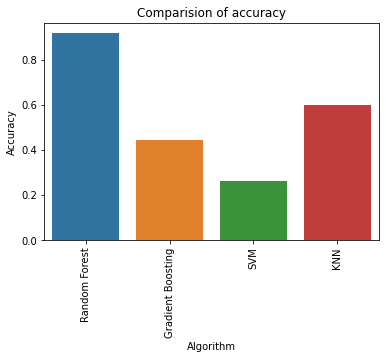

In [ ]:
sns.barplot(x='Algorithm',y='Accuracy',data=data)
plt.title('Comparision of accuracy')
plt.xticks(rotation=90)